In [144]:
import os
import numpy as np
import subprocess
import time
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid')

configs = None
with open('positions.txt','r') as file:
    configs = file.readlines()

for i in range(len(configs)) :
    configs[i] = configs[i].strip()
    configs[i] = configs[i][:-1]

CONFIGS = []
for i in range(len(configs)//2) :
    CONFIGS.append(configs[i] + ' ' + configs[2*i + 1])

In [145]:
nDOFs = 3
def generate_cmds(cfgs, method):
    cmds = []
    for i in cfgs :
        c = f'./planner.out map2.txt {nDOFs} {i} {method} myOutput.txt'
        cmds.append(c)
    return cmds

cmds_rrt = generate_cmds(CONFIGS, 0)
cmds_rrtstar = generate_cmds(CONFIGS, 1)
cmds_prm = generate_cmds(CONFIGS, 2)
with open('commandsrrt.txt','w') as file:
    for i in cmds_rrt :
        file.write(i)
        file.write('\n')
file.close()

with open('commandsrrtstar.txt','w') as file:
    for i in cmds_rrtstar :
        file.write(i)
        file.write('\n')
file.close()

with open('commandsprm.txt','w') as file:
    for i in cmds_prm :
        file.write(i)
        file.write('\n')
file.close()


In [146]:
Costs = []
Nodes = []
Time = []
str = '1000'
with open(f'rrt{str}.txt') as file:
    cost = []
    time = []
    nodes = []
    lines = file.readlines()
    for line in lines :
        l = list(line.split())
        if l[0] == 'Cost':
            cost.append(float(l[-1]))
        elif l[0] == 'Time':
            time.append(float(l[-2]))
        elif l[0] == 'Nodes':
            nodes.append(int(l[-1]) - 1)
    Costs.append(cost)
    Nodes.append(nodes)
    Time.append(time)
file.close()

with open(f'rrtstar{str}.txt') as file:
    cost = []
    time = []
    nodes = []
    lines = file.readlines()
    for line in lines :
        l = list(line.split())
        if l[0] == 'Cost':
            cost.append(float(l[-1]))
        elif l[0] == 'Time':
            time.append(float(l[-2]))
        elif l[0] == 'Nodes':
            nodes.append(int(l[-1]) - 1)
    Costs.append(cost)
    Nodes.append(nodes)
    Time.append(time)
file.close()

with open(f'prm{str}.txt') as file:
    cost = []
    time = []
    nodes = []
    lines = file.readlines()
    for line in lines :
        l = list(line.split())
        if l[0] == 'Cost':
            cost.append(float(l[-1]))
        elif l[0] == 'Time':
            time.append(float(l[-2]))
        elif l[0] == 'Nodes':
            nodes.append(int(l[-1]) - 1)
    Costs.append(cost)
    Nodes.append(nodes)
    Time.append(time)
file.close()

sorted_indices = sorted(range(len(Costs[1])), key=lambda k: Costs[1][k])

# Reorder list2 and list3 based on sorted_indices
Costs[0] = [Costs[0][i] for i in sorted_indices]
Costs[1] = [Costs[1][i] for i in sorted_indices]
Costs[2] = [Costs[2][i] for i in sorted_indices]

Time[0] = [Time[0][i] for i in sorted_indices]
Time[1] = [Time[1][i] for i in sorted_indices]
Time[2] = [Time[2][i] for i in sorted_indices]

Nodes[0] = [Nodes[0][i] for i in sorted_indices]
Nodes[1] = [Nodes[1][i] for i in sorted_indices]
Nodes[2] = [Nodes[2][i] for i in sorted_indices]

X = [i for i in range(0,20)]
print(Costs)
print(Nodes)
print(Time)

for i in range(3) :
    t = np.array(Time[i])
    c = np.array(Costs[i])
    n = np.array(Nodes[i])
    print(f"Method {i} : {len(np.where(t < 5)[0])*100/20}%")
    print(f"Average time : {np.average(t)}")
    print(f"Average cost : {np.average(c)}")
    print(f"Average nodes : {np.average(n)}")
    print(f"Max time : {np.max(t)}")
    print(f"Max cost : {np.max(c)}")
    print(f"Max nodes : {np.max(n)}")

SIZE = (14,5)

[[0.685735, 1.43354, 1.0583, 1.11306, 1.22905, 1.24879, 1.79216, 3.01696, 4.32706, 2.63005, 2.70338, 3.24286, 3.63358, 3.36767, 5.65029, 8.35417, 5.84191, 7.48777, 11.395, 15.0557], [0.685735, 1.02245, 1.0583, 1.11306, 1.22905, 1.24879, 1.51437, 2.17822, 2.26803, 2.62056, 2.67327, 3.03934, 3.27224, 3.32429, 3.45273, 5.06057, 5.42383, 5.87333, 6.16407, 7.63963], [0.920477, 1.20965, 1.25943, 1.12956, 1.3709, 1.41282, 1.52557, 2.93327, 4.45189, 3.15917, 5.5069, 3.3242, 3.89567, 3.80823, 4.5879, 6.55114, 5.41695, 8.05521, 6.14405, 10.0985]]
[[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1600, 1000, 1000, 1000]]
[[2.126727837, 2.114210169, 2.562360424, 2.25502722, 2.369433445, 2.268053704, 2.260421846

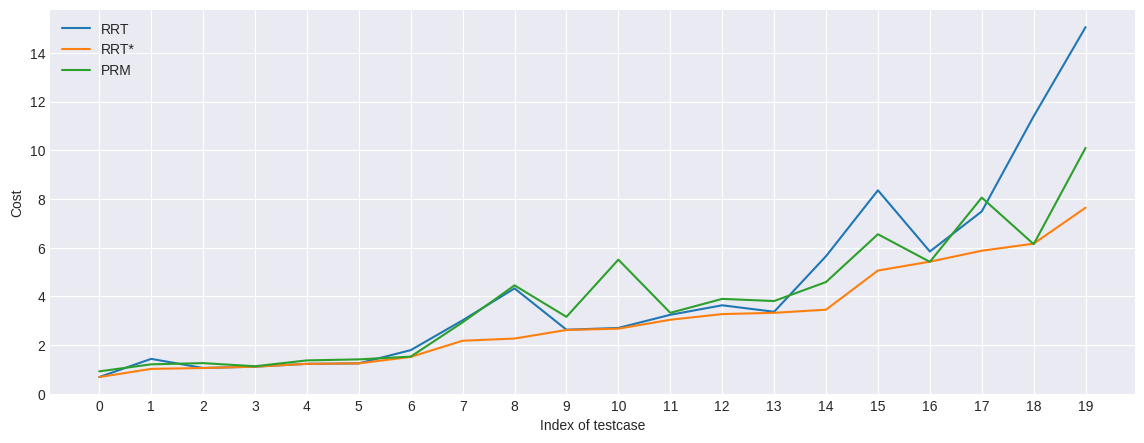

In [147]:
str = '2'
plt.figure(figsize=SIZE)
plt.plot(X, Costs[0], label = 'RRT')
plt.plot(X, Costs[1], label = 'RRT*')
plt.plot(X, Costs[2], label = 'PRM')
plt.legend()
plt.xticks(range(len(X)), X)

plt.xlabel('Index of testcase')
plt.ylabel('Cost')
plt.savefig(f'../report/plot1_{str}.png')
plt.show()

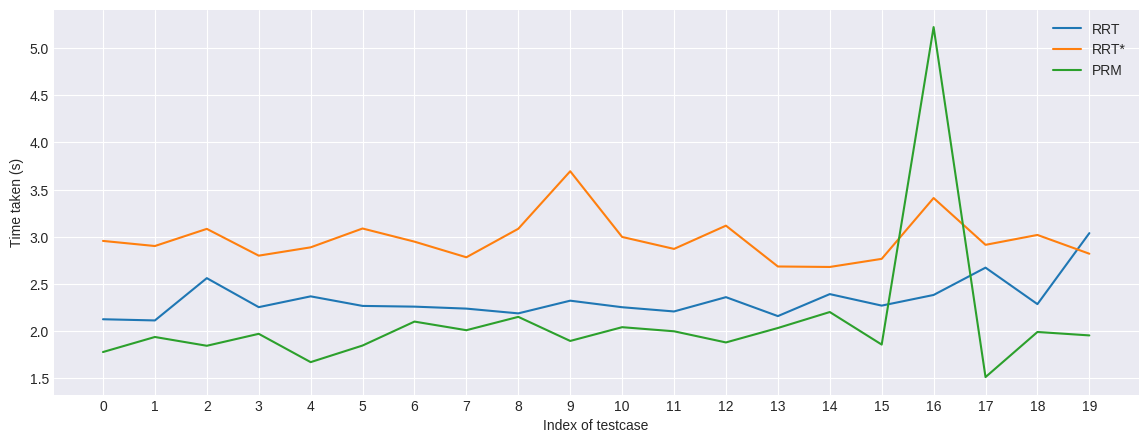

In [148]:
plt.figure(figsize=SIZE)
plt.plot(Time[0], label = 'RRT')
plt.plot(Time[1], label = 'RRT*')
plt.plot(Time[2], label = 'PRM')
plt.legend()
plt.xticks(range(len(X)), X)

plt.xlabel('Index of testcase')
plt.ylabel('Time taken (s)')
plt.savefig(f'../report/plot2_{str}.png')
plt.show()

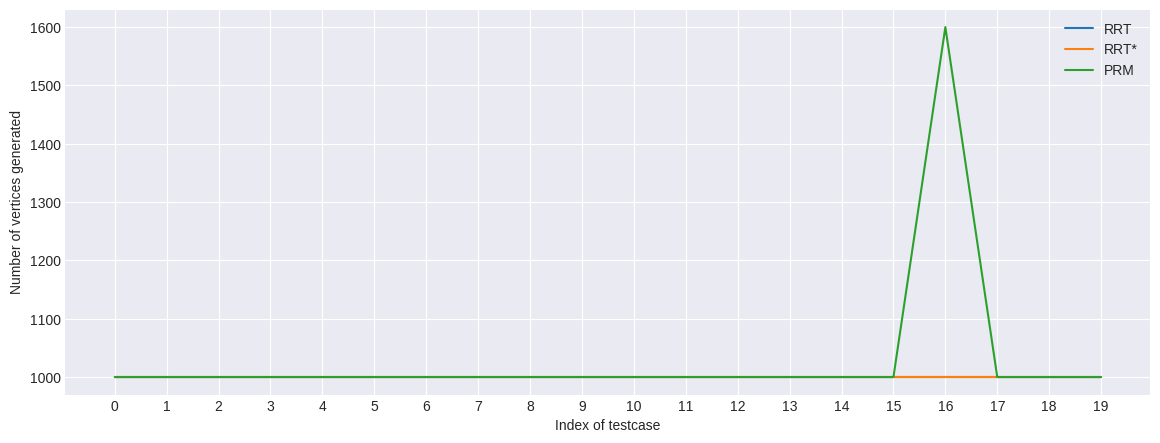

In [149]:
plt.figure(figsize=SIZE)
plt.plot(Nodes[0], label = 'RRT')
plt.plot(Nodes[1], label = 'RRT*')
plt.plot(Nodes[2], label = 'PRM')
plt.legend()
plt.xticks(range(len(X)), X)

plt.xlabel('Index of testcase')
plt.ylabel('Number of vertices generated')
plt.savefig(f'../report/plot3_{str}.png')
plt.show()